In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
#load the data
data = np.genfromtxt('self_driving_model.txt', delimiter=' ')
X = data[:, :4]
y = data[:, 4:]

In [3]:
def seq_model_to_sim(model):
    params = []
    model_shape = []
    for layer in model:
        if isinstance(layer, torch.nn.Linear):
            params.extend(layer.weight.data.numpy().reshape(-1).tolist())
            params.extend(layer.bias.data.numpy().reshape(-1).tolist())
            model_shape.append(layer.weight.shape[0])
    
    print("Model shape: {}".format(model_shape[:-1]))
    to_print = ""
    for b in params:
        to_print += "{:.4f},".format(b)
    print("Model weights: {}".format(to_print[:-1]))


In [4]:
#build an abstract model
model = torch.nn.Sequential(torch.nn.Linear(4,10),
                           torch.nn.ReLU(),
                           torch.nn.Linear(10, 10),
                           torch.nn.ReLU(),
                           torch.nn.Linear(10, 2))

In [5]:
#using Adam to optimize
loss_function = torch.nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr=1e-3)

In [6]:
#Train the model
n_epochs = 100
batch_size = 32
losses = []
for epoch in range(n_epochs):
    
    # Slice random batch
    indices = np.random.randint(0, X.shape[0], batch_size)
    inp = torch.from_numpy(X[indices]).type(torch.FloatTensor)
    out = torch.from_numpy(y[indices]).type(torch.FloatTensor)
    
    # Forward prop
    preds = model.forward(inp)
    
    # Calculate Loss
    loss = loss_function(preds, out)
    losses.append(loss)
    
    # Backprop
    opt.zero_grad()
    loss.backward()
    opt.step()
    

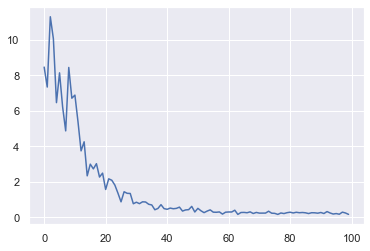

In [7]:
# Plot loss vs iters
epochs = np.arange(0, n_epochs, 1)
plt.plot(epochs, losses);

In [8]:
# Get model's parameters
seq_model_to_sim(model)

Model shape: [10, 10]
Model weights: -0.3593,0.4790,0.0469,0.1216,0.0089,-0.0962,0.0956,0.1578,0.1631,0.1553,0.4537,-0.0114,-0.1283,0.1297,0.2693,0.1886,-0.1711,0.0569,-0.4687,0.3471,-0.4286,-0.2568,0.1499,0.2975,0.4542,0.0172,0.1206,-0.3437,0.3559,0.4062,0.3600,0.2702,-0.4691,0.4078,-0.0517,-0.4122,0.3470,-0.1639,0.0333,-0.3979,-0.2832,-0.1749,-0.0293,0.4418,0.3631,0.1157,-0.2723,-0.0824,0.5004,-0.3728,0.2122,0.2287,0.1532,-0.0510,-0.1006,-0.0625,0.1272,0.2559,0.0864,-0.0903,-0.1335,0.2542,-0.2254,-0.0765,0.1011,-0.1191,0.2640,-0.2634,-0.1400,0.0876,0.2501,0.2694,-0.0994,0.1662,-0.0032,-0.1778,0.2497,0.2645,-0.2078,-0.0936,-0.0780,0.2781,0.2061,0.0770,-0.1607,-0.1228,-0.0341,-0.2486,0.0599,0.2950,-0.2700,-0.2757,0.1233,-0.0382,-0.2897,0.0838,0.0072,-0.2394,0.2999,-0.0332,0.2340,-0.0908,-0.1039,-0.2245,-0.3042,-0.1534,-0.1884,-0.1681,0.1816,0.2072,0.1407,0.0657,-0.0363,-0.0097,-0.2829,-0.0115,-0.0231,0.0524,0.0494,-0.0988,0.0424,0.1916,-0.2869,0.0931,0.1543,0.2136,-0.2006,-0.2535,0.172